# Yulu Business Case Study

### Table of Content
1. Import Libraries & Dataset
2. Data Investigation
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA) on Categorical Features
5. Exploratory Data Analysis (EDA) on Numerical Features
6. Top 10 Insights & Recommendation

# 1. Importing Libraries and Dataset

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

In [373]:
df = pd.read_csv("yulu_bike.csv")

In [374]:
# !pip install statsmodels 

# 2. Data Investigation

In [375]:
# First 5 rows of data
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [376]:
# Shape of the dataset
df.shape

(10886, 12)

**Features:** 12\
**Records:** 10886

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


1. **datetime is object. So if needed we can convert the dtype into datetime for easier analysis.** 
2. **Categorical features has dtype as int. So we can convert those features into category for easier EDA**
3. **atemp is a feel like temperature and it is calculated using temperature, humidity and widspeed. So basically atemp is dependent on these three features and we will test that in hypothesis testing and if they are dependent then we can use atemp only to derive the conclusion.**

In [378]:
# Checking missing values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**No missing values**

In [379]:
# Checking the range of dates in which data are recorded
first_date = pd.to_datetime(df['datetime'].min())
last_date = pd.to_datetime(df['datetime'].max())
date_range = round((last_date - first_date)/np.timedelta64(1, 'D'))
print(f"First date: {first_date.date()}")
print(f"Last date: {last_date.date()}")
print(f"Range: {date_range} days")

First date: 2011-01-01
Last date: 2012-12-19
Range: 719 days


In [380]:
# Checking the time interval of the data recording
df_datetime = df['datetime'].apply(lambda x: pd.to_datetime(x))
df_datetime_prev = df_datetime.shift(1)
df["time_interval"] = (df_datetime - df_datetime_prev)/np.timedelta64(1, "h")

In [381]:
df["time_interval"].unique()

array([ nan,   1.,   2.,   3.,  13., 289., 217., 265., 241.])

In [382]:
df["time_interval"].value_counts()

1.0      10820
2.0         36
289.0       13
265.0        8
3.0          5
13.0         1
217.0        1
241.0        1
Name: time_interval, dtype: int64

In [383]:
df["time_interval"].isnull().sum()

1

**Data are recoded for 719 days from 1st Jan 2011 to 19th Dec 2012 in every one hour (except some records). There is some inconsistency in recpording time of the data.**

In [384]:
# Checking the range of Humidity
df["humidity"].min(), df["humidity"].max()

(0, 100)

**If the humidity is relative humadity then achieving 0% and 100% humudity is quite impossible. Highest humidity recorded is 99.2% and lowest humidity recorded is 0.03%**

In [385]:
# Checking the range of temperature
df["temp"].min(), df["temp"].max()

(0.82, 41.0)

In [386]:
# Checking the range of feel like temperature
df["atemp"].min(), df["atemp"].max()

(0.76, 45.455)

**Both temperature and feel like temperature are within permissible range**

In [387]:
# Checking the range of feel like windspeed
df["windspeed"].min(), df["windspeed"].max()

(0.0, 56.9969)

In [388]:
# Checking unique values of categorical features
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**1: spring, 2: summer, 3: fall, 4: winter**

In [389]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

 **1: Holiday, 0: Not holiday**

In [390]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

**1: Working day, 0: Weekend/holiday**

In [391]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**1: Clear Sky or Partly Cloudy, 2: Mist and Cloudy, 3: Light Rain, 4: Heavy Rain**

**Note:** There is only one records for heavy rain. One row is not going to give any insights, so we can include that row in Light Rain

# 3. Data Cleaning & Preprocessing

There is not a much of preprocessing work to do on the data. There is not missing value, so, no imputation required. Just need to convert heavy rain into light rain as there is only one records of heavy rain.

In [392]:
df["weather"].replace(4, 3, inplace=True)

In [393]:
df["weather"].value_counts()

1    7192
2    2834
3     860
Name: weather, dtype: int64

In [394]:
# converting dtype of datetime column from Object to datetime
df["datetime"] = df["datetime"].apply(lambda x: pd.to_datetime(x))

In [395]:
cat_features = []
num_features = []
for column in df.columns:
    if column !="datetime" and column != "time_interval":
        if df[column].nunique()<=4:
            cat_features.append(column)
        else:
            num_features.append(column)

In [396]:
cat_features

['season', 'holiday', 'workingday', 'weather']

In [397]:
num_features

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [398]:
# Converting int to category for catrgorical feature
df["season"].replace([1,2,3,4], ["spring", "summer", "fall", "winter"], inplace=True)
df["holiday"].replace([0, 1], ["non-holiday", "holiday"], inplace=True)
df["workingday"].replace([0, 1], ["non-workingday", "workingday"], inplace=True)
df["weather"].replace([1,2,3], ["clear", "cloudy", "rain"], inplace=True)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         10886 non-null  object        
 2   holiday        10886 non-null  object        
 3   workingday     10886 non-null  object        
 4   weather        10886 non-null  object        
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       10886 non-null  int64         
 8   windspeed      10886 non-null  float64       
 9   casual         10886 non-null  int64         
 10  registered     10886 non-null  int64         
 11  count          10886 non-null  int64         
 12  time_interval  10885 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 1.1+ MB


## Outliers

In [400]:
def outliers_plot(col):
    n = len(col)
    c= 4
    r=int(np.ceil(n/c))
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(r,c,i+1)
        sns.boxplot(x=df[col[i]])
        plt.title(f"Distribution of {col[i]} features")
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()

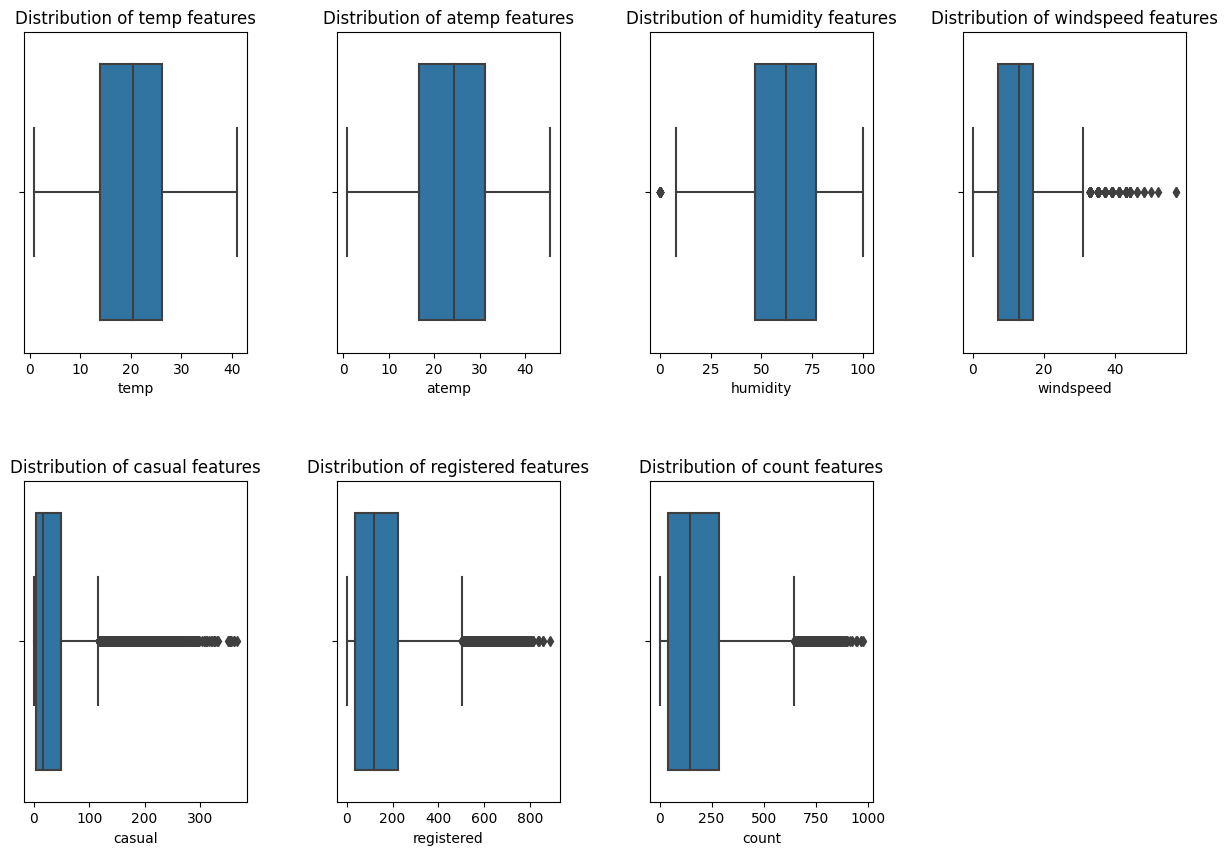

In [401]:
outliers_plot(num_features)

**Insights:**
1. There are few oultliers in windspeed
2. We can see outliers in casual, registered and count featutes. This is due to right skewed data.

# 4. Exploratory Data Analysis (EDA) on Categorical Features

## 1. Univariate Analysis

### 1.1. Count plot of categorical features

In [402]:
# Count plot of categorical features
def count_plot(col):
    n = len(col)
    c=2
    r=int(np.ceil(n/c))
    plt.figure(figsize=(10, 8))
    for i in range(n):
        plt.subplot(r,c,i+1)
        sns.countplot(x=df[col[i]], width=0.5)
        plt.title(f"Distribution of {col[i]} features")
    plt.subplots_adjust(hspace=0.4)
    plt.show()

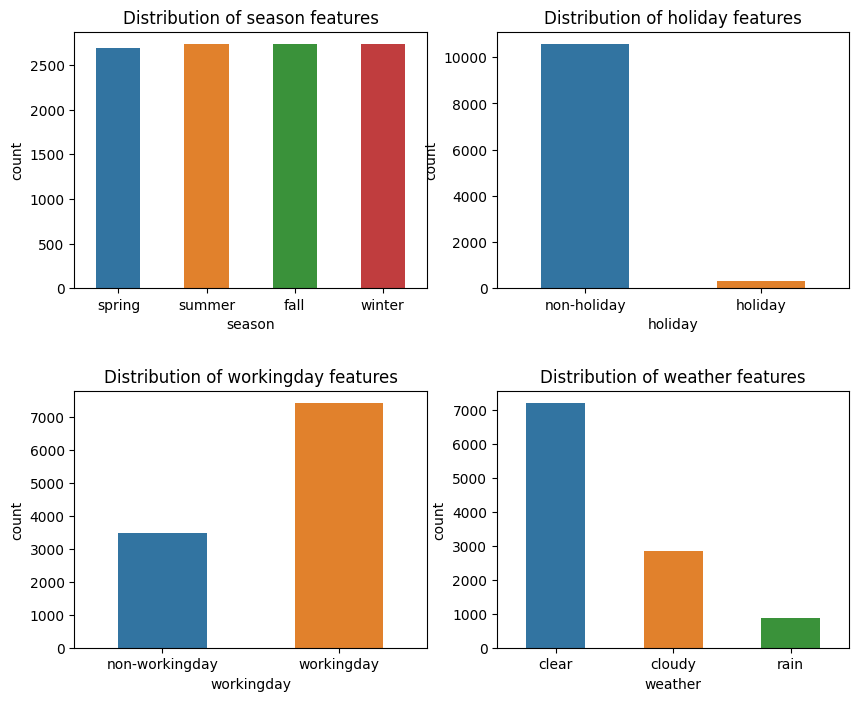

In [403]:
count_plot(cat_features)

**Insights:**
1. Number of records in each season is almost same
2. In the dataset, there is very few holiday records
3. Similarly, not working day record is lesser than the working day
4. Most of the records are from clear weather

### 1.2. Distribution plot of numerical features

In [404]:
def distribution_plot(col):
    n = len(col)
    c= 4
    r=int(np.ceil(n/c))
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(r,c,i+1)
        sns.kdeplot(x=df[col[i]], fill=True)
        plt.title(f"Distribution of {col[i]} features")
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()

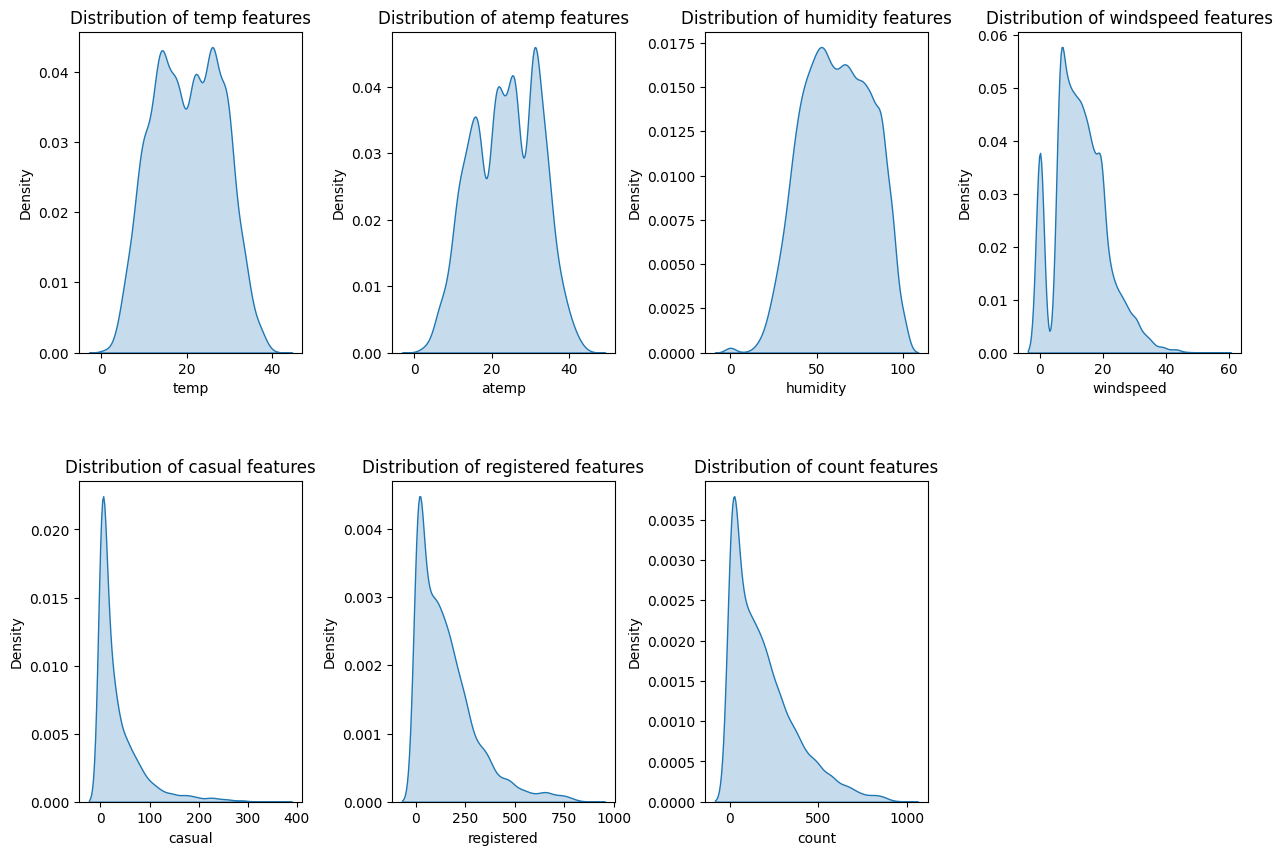

In [405]:
distribution_plot(num_features)

**Insights:**
1. None of the distribution looks like a Normal Distribution. For more clarity we can perform some test to check the normality in Hypothesis testing section.
2. Count feature is a sum of casual and registered features. So all three distribution looks like similar and resembles **Log Normal Distribution**.

## 2. Bivariate Analysis and Hypothesis Testing

### 2.1. Effect of Seasaon on Number of bikes rented

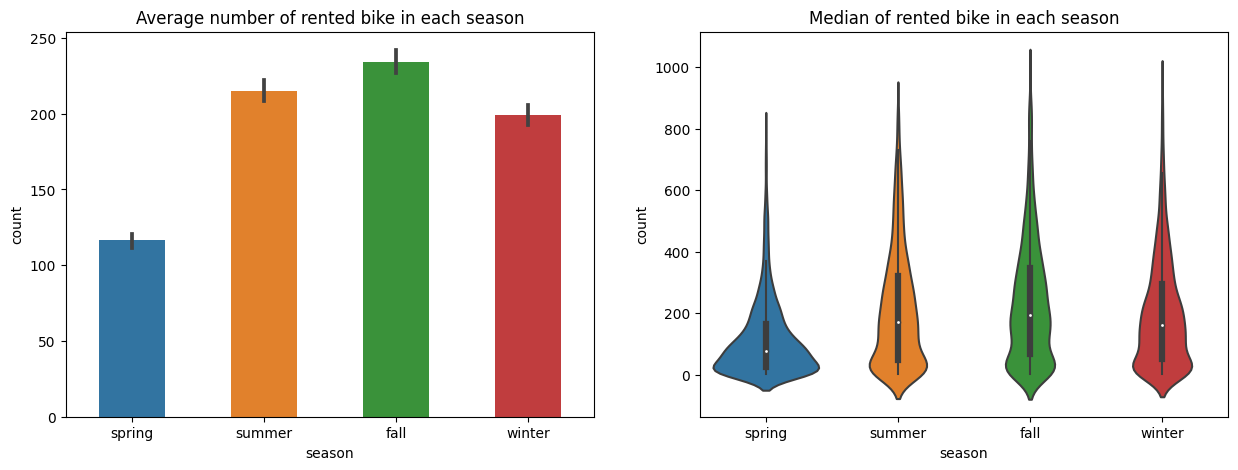

In [406]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x="season", y="count", estimator='mean', width=0.5)
plt.title("Average number of rented bike in each season")

plt.subplot(1,2,2)
sns.violinplot(data=df, x="season", y="count")
plt.title("Median of rented bike in each season")
plt.show()

### Hypothesis Testing

As we have four distribution (spring, summer, fall and winter) to test, we will perform **ANOVA test**. But to perform ANOVA test we need to check 3 assumptions: 
1. Sample should be normally distributed.
2. Sample should have equal varience.
3. they should be Independent.

If these assumptions fail then we will perform **Kruskal test**.\
**Note:** For better understanding even if the assumptions fail, we will go ahead with ANOVA test along woth Kruskal test

In [407]:
def cal_mean(colname, categories, target):
    for cat in categories:
        mu = np.mean(df[df[colname]==cat][target])
        print(f"Mean of {cat}: {round(mu)}")

In [408]:
cal_mean("season", ["spring", "summer", "fall", "winter"], "count")

Mean of spring: 116
Mean of summer: 215
Mean of fall: 234
Mean of winter: 199


### Test of Normality

In [409]:
# count distribution plot showed that the 
# distribution looks like a log normal distribution. 
# So first of all we will convert the distribution 
# into log distribution and then will check for the normality
df["log_count"] = np.log(df["count"])

<AxesSubplot: xlabel='log_count', ylabel='Density'>

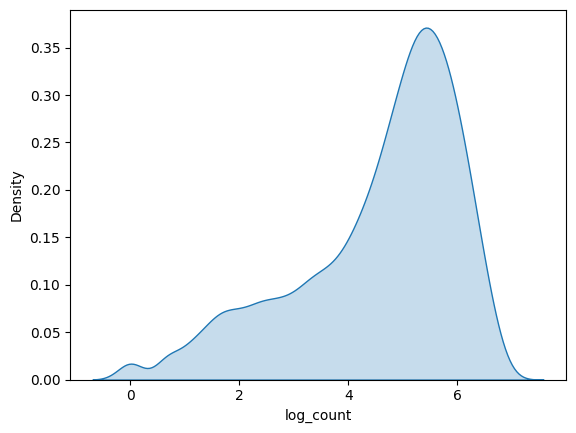

In [410]:
sns.kdeplot(x=df["log_count"], fill=True)

#### QQPlot

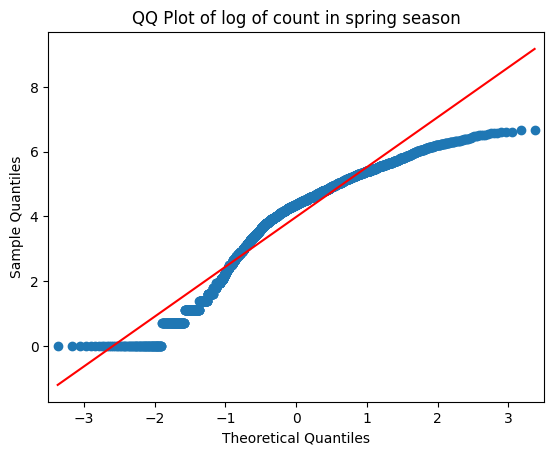

In [411]:
qqplot(df[df["season"]=="spring"]["log_count"], line="s")
plt.title("QQ Plot of log of count in spring season")
plt.show()

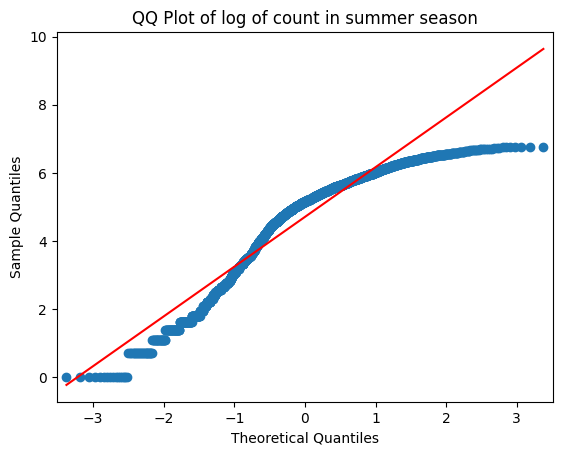

In [412]:
qqplot(df[df["season"]=="summer"]["log_count"], line="s")
plt.title("QQ Plot of log of count in summer season")
plt.show()

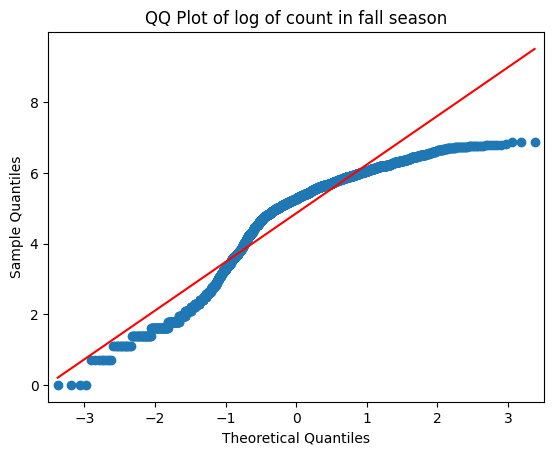

In [413]:
qqplot(df[df["season"]=="fall"]["log_count"], line="s")
plt.title("QQ Plot of log of count in fall season")
plt.show()

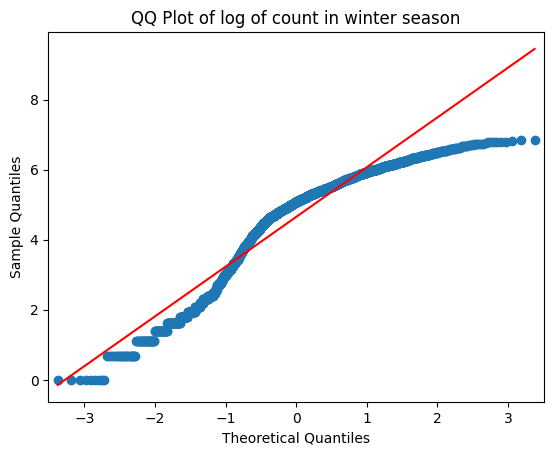

In [414]:
qqplot(df[df["season"]=="winter"]["log_count"], line="s")
plt.title("QQ Plot of log of count in winter season")
plt.show()

#### Shapiro-Wilk Normality test

**Ho = distribution is gaussian**\
**Ha = distribution is not gaussain**

In [415]:
def shapiro_wilk_test(colname, categories, target, alpha):
    for cat in categories:
        score, pval = stats.shapiro(df[df[colname]==cat][target])
        if pval < alpha:
            print(f"{cat} is not Normally distibuted")
        else:
            print(f"{cat} is Normally distibuted")

In [416]:
colname = "season"
categories = ["spring", "summer", "fall", "winter"]
target = "log_count"
alpha = 0.05
shapiro_wilk_test(colname, categories, target, alpha)

spring is not Normally distibuted
summer is not Normally distibuted
fall is not Normally distibuted
winter is not Normally distibuted


### Test of Variance (Levene Test)

**Ho = Variances are equal among distribution**\
**Ha = Variances are not equal among distribution**

In [417]:
test_stats, pval = stats.levene(
    df[df["season"]=="spring"]["log_count"],
    df[df["season"]=="summer"]["log_count"],
    df[df["season"]=="fall"]["log_count"],
    df[df["season"]=="winter"]["log_count"]
)
if pval<0.05:
    print("Variances are not similar among distribution")
else:
    print(" Variances are equal among distribution")

Variances are not similar among distribution


1. Both QQ plot and Shapiro-Walkin test proves that the count of bikes rented across season is not normally distributed
2. Levene test proves that there is no homogenity of varience among the distribution**
3. All the ditributions are independent to each other**
**As the assumptions of ANOVA test failed, we will perform Kruskal test along with ANOVA test**

### ANOVA Test

**Ho = All the distributions are same**\
**Ha = Atleat one of the distribution is different**

In [418]:
f_stats, pval = stats.f_oneway(
    df[df["season"]=="spring"]["log_count"],
    df[df["season"]=="summer"]["log_count"],
    df[df["season"]=="fall"]["log_count"],
    df[df["season"]=="winter"]["log_count"]
)
if pval<0.05:
    print("Atleats one of the distribution is different.")
    print("That means season is significant in predicting the demand for bike")
else:
    print("All of the distribution is same.")
    print("That means there is no significant contribution\
    of season in predicting the demand for bike")

Atleats one of the distribution is different.
That means season is significant in predicting the demand for bike


### Kruskal Test

**Ho = All the distributions are same**\
**Ha = Atleat one of the distribution is different**

In [419]:
test_stats, pval = stats.kruskal(
    df[df["season"]=="spring"]["log_count"],
    df[df["season"]=="summer"]["log_count"],
    df[df["season"]=="fall"]["log_count"],
    df[df["season"]=="winter"]["log_count"]
)
if pval<0.05:
    print("Atleats one of the distribution is different.")
    print("That means season is significant in predicting the demand for bike")
else:
    print("All of the distribution is same.")
    print("That means there is no significant contribution\
    of season in predicting the demand for bike")

Atleats one of the distribution is different.
That means season is significant in predicting the demand for bike


**Insights:**
1. On an average Spring season saw least number of bikes rented, wheresas in Fall season maximum number of bikes were rented
2. Also hypothesis testing proves that the difference is significant in predicting the demand for bike based on season. So number of bikes rented is different is different season

### 2.2. Effect of working day and non working days on number of bikes rented

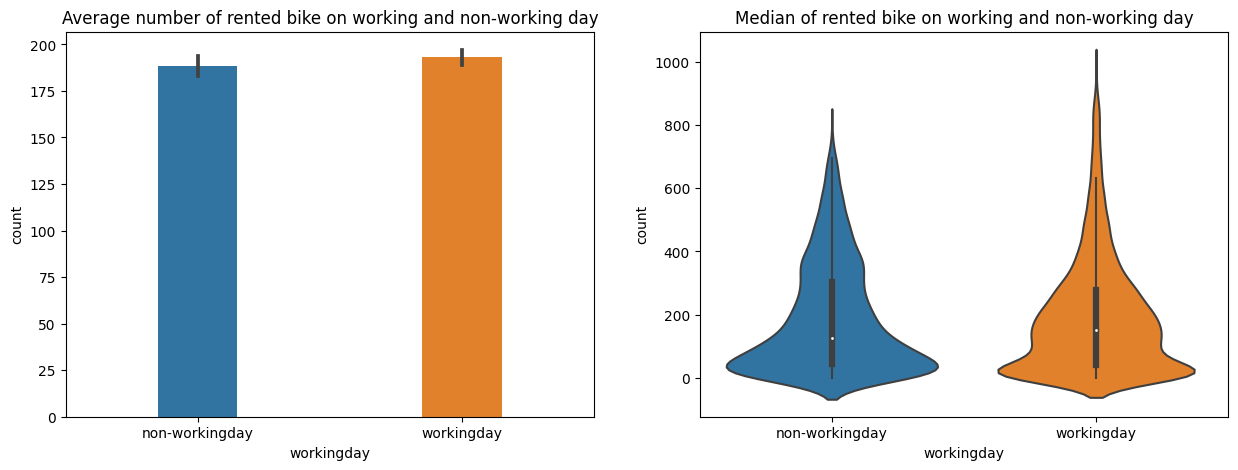

In [420]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x="workingday", y="count", estimator='mean', width=0.3)
plt.title("Average number of rented bike on working and non-working day")

plt.subplot(1,2,2)
sns.violinplot(data=df, x="workingday", y="count")
plt.title("Median of rented bike on working and non-working day")
plt.show()

**Insights:**
1. Mean number of bikes rented on working days and non working days are almost similar. So, in the hypothesis testing we will see whether the bike rents on working day is higher or not

### Hypothesis Testing

As the number of distribution is only 2 (Workingday and non-workingday), T-test will be used to check wheather the number of rented is dependent on workingday feature or not.

In [421]:
cal_mean("workingday", ["workingday", "non-workingday",], "count")

Mean of workingday: 193
Mean of non-workingday: 189


<AxesSubplot: xlabel='count', ylabel='Density'>

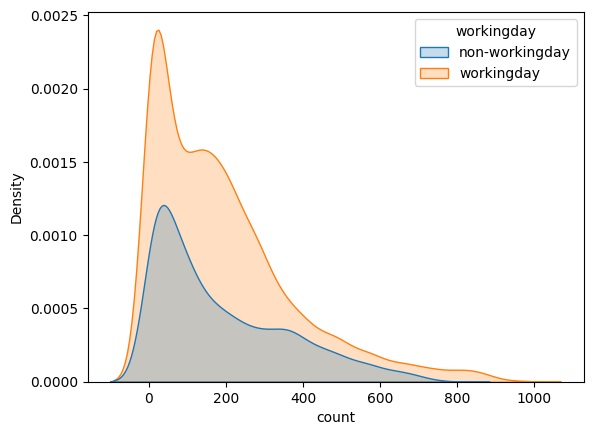

In [422]:
sns.kdeplot(data=df, x="count", hue="workingday", fill=True)

### Test of Variance (Levene Test)

**Ho = Variances are equal among distribution**\
**Ha = Variances are not equal among distribution**

In [423]:
test_stats, pval = stats.levene(
    df[df["workingday"]=="workingday"]["count"],
    df[df["workingday"]=="non-workingday"]["count"]
)
if pval<0.05:
    print("Variances are not similar among distribution")
else:
    print(" Variances are equal among distribution")

 Variances are equal among distribution


**Mean is almost same but the distribution of working and non-working day is different. In this case T-test will fail. So, we will perform both T test and KS test**

### T Test 

**Ho = Mean of bikes rented on working and non working day is same**\
**Ha = Mean of bikes rented on working and non working day is not same**

In [424]:
t_stats, pval = stats.ttest_ind(
    df[df["workingday"]=="workingday"]["count"],
    df[df["workingday"]=="non-workingday"]["count"],
    alternative="greater"
)
if pval<0.05:
    print("Mean of bikes rented on working and non-working day is not same")
    print("That means working and non-working day affects the number of bikes rented")
else:
    print("Mean of bikes rented on working and non-working day is same")
    print("That means working and non-working day does not affect the number\
    of bikes rented")

Mean of bikes rented on working and non-working day is same
That means working and non-working day does not affect the number    of bikes rented


### KS Test

**Ho = Mean of bikes rented on working and non working day is same**\
**Ha = Mean of bikes rented on working and non working day is not same**

In [425]:
test_stats, pval = stats.kstest(
    df[df["workingday"]=="workingday"]["count"],
    df[df["workingday"]=="non-workingday"]["count"]
)

if pval<0.05:
    print("Mean of bikes rented on working and non-working day is not same")
    print("That means working and non-working day affects the number of bikes rented")
else:
    print("Mean of bikes rented on working and non-working day is same")
    print("That means working and non-working day does not affect the number\
    of bikes rented")

Mean of bikes rented on working and non-working day is not same
That means working and non-working day affects the number of bikes rented


**Insights:**
1. Mean of the both working and non working day is alomost same but the distribution is different due to which t-test indicates that there is no effect of working and non-working days on the bike rented. 
2. But KS test proves that the working day and non-working days are significant in predicting the demand of the bike rented.

### 2.3. Effect of  holiday and non-holiday on number of bikes rented

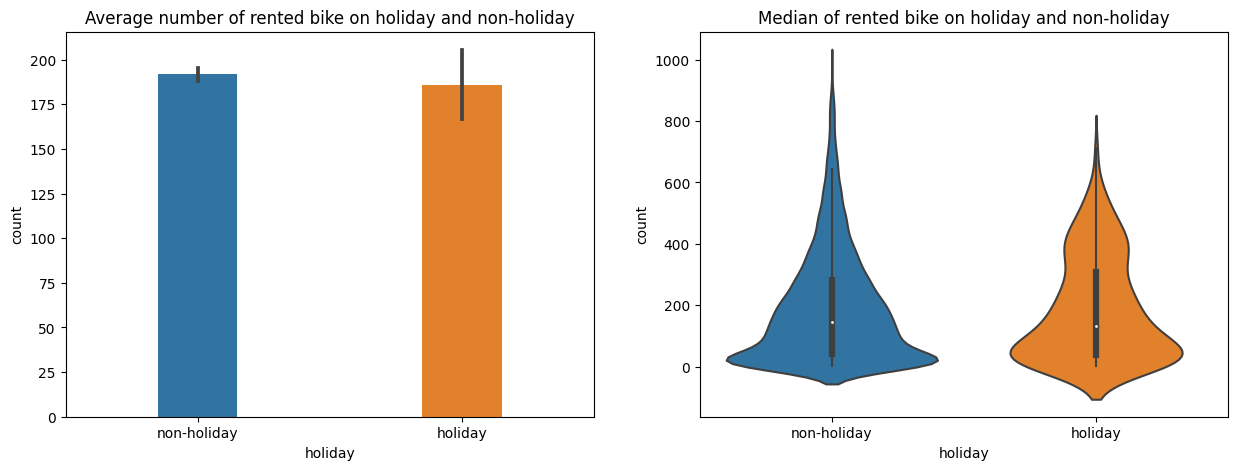

In [426]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x="holiday", y="count", estimator='mean', width=0.3)
plt.title("Average number of rented bike on holiday and non-holiday")

plt.subplot(1,2,2)
sns.violinplot(data=df, x="holiday", y="count")
plt.title("Median of rented bike on holiday and non-holiday")
plt.show()

**Insights:**
1. Similar to working day, mean number of bikes rented on holidays and non-holidays are almost similar. But it looks like there is more variation in number of bikes rented on the holidays

### Hypothesis Testing

As the number of distribution is only 2 (holiday and non-holiday), T-test will be used to check wheather the number of rented is dependent on workingday feature or not.

In [427]:
cal_mean("holiday", ["holiday", "non-holiday",], "count")

Mean of holiday: 186
Mean of non-holiday: 192


<AxesSubplot: xlabel='count', ylabel='Density'>

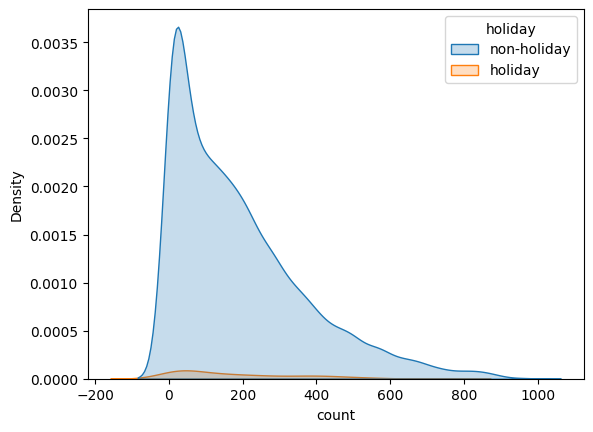

In [428]:
sns.kdeplot(data=df, x="count", hue="holiday", fill=True)

### Test of Variance (Levene Test)

**Ho = Variances are equal among distribution**\
**Ha = Variances are not equal among distribution**

In [429]:
test_stats, pval = stats.levene(
    df[df["holiday"]=="holiday"]["count"],
    df[df["holiday"]=="non-holiday"]["count"]
)
if pval<0.05:
    print("Variances are not similar among distribution")
else:
    print(" Variances are equal among distribution")

 Variances are equal among distribution


**Mean is almost same but the distribution of holiday and non-holiday is different. In this case T-test will fail. So, we will perform both T test and KS test**

### T Test 

**Ho = Mean of bikes rented on holiday and non-holiday is same**\
**Ha = Mean of bikes rented on holiday and non-holiday is not same**

In [430]:
t_stats, pval = stats.ttest_ind(
    df[df["holiday"]=="holiday"]["count"],
    df[df["holiday"]=="non-holiday"]["count"],
    alternative="less"
)
if pval<0.05:
    print("Mean of bikes rented on holiday and non-holiday day is not same")
    print("That means holiday and non-holiday day affects the number of bikes rented")
else:
    print("Mean of bikes rented on holiday and non-holiday day is same")
    print("That means holiday and non-holiday day does not affect the number\
    of bikes rented")

Mean of bikes rented on holiday and non-holiday day is same
That means holiday and non-holiday day does not affect the number    of bikes rented


### KS Test

**Ho = Mean of bikes rented on holiday and non-holiday is same**\
**Ha = Mean of bikes rented on holiday and non-holiday is not same**

In [431]:
test_stats, pval = stats.kstest(
    df[df["holiday"]=="holiday"]["count"],
    df[df["holiday"]=="non-holiday"]["count"],
)
if pval<0.05:
    print("Mean of bikes rented on holiday and non-holiday day is not same")
    print("That means holiday and non-holiday day affects the number of bikes rented")
else:
    print("Mean of bikes rented on holiday and non-holiday day is same")
    print("That means holiday and non-holiday day does not affect the number\
    of bikes rented")

Mean of bikes rented on holiday and non-holiday day is same
That means holiday and non-holiday day does not affect the number    of bikes rented


**Insights:**
1. Both T test and KS test proves that Mean of the both holiday and non-holiday is alomost same
2. It proves that holiday and non-holiday are not significant in predicting the demand of the bike rented.

### 2.4. Distribution of rented bike across different weather condition

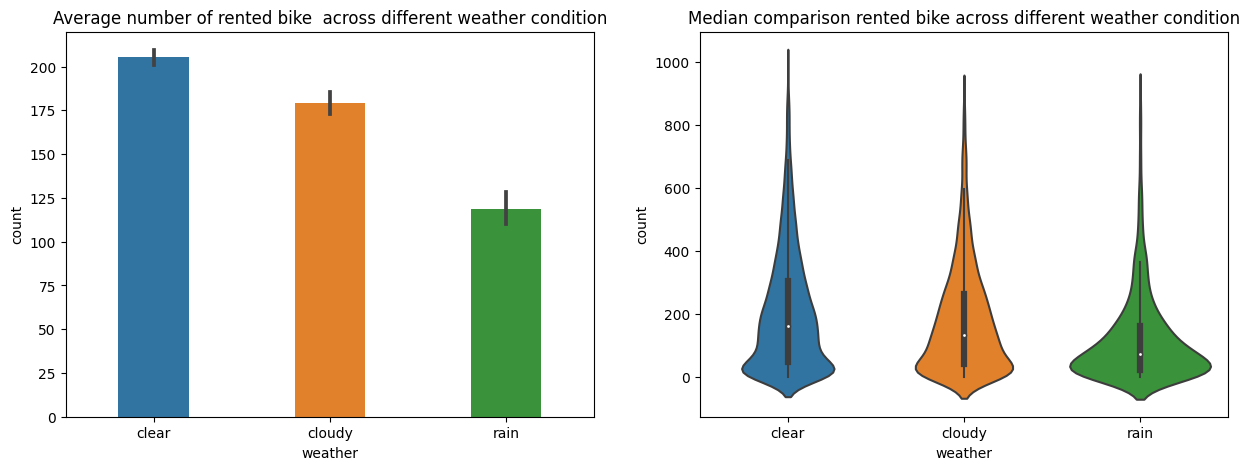

In [432]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x="weather", y="count", estimator='mean', width=0.4)
plt.title("Average number of rented bike  across different weather condition")

plt.subplot(1,2,2)
sns.violinplot(data=df, y="count", x="weather")
plt.title("Median comparison rented bike across different weather condition")
plt.show()

### Hypothesis Testing

As we have four distribution (clear, cloudy and rain) to test, we will perform **ANOVA test**. But to perform ANOVA test we need to check 3 assumptions: 
1. Sample should be normally distributed.
2. Sample should have equal varience.
3. they should be Independent.

If these assumptions fail then we will perform **Kruskal test**.\
**Note:** For better understanding even if the assumptions fail, we will go ahead with ANOVA test along woth Kruskal test

In [433]:
cal_mean("weather", ["clear", "cloudy", "rain"], "count")

Mean of clear: 205
Mean of cloudy: 179
Mean of rain: 119


### Test of Normality

#### QQPlot

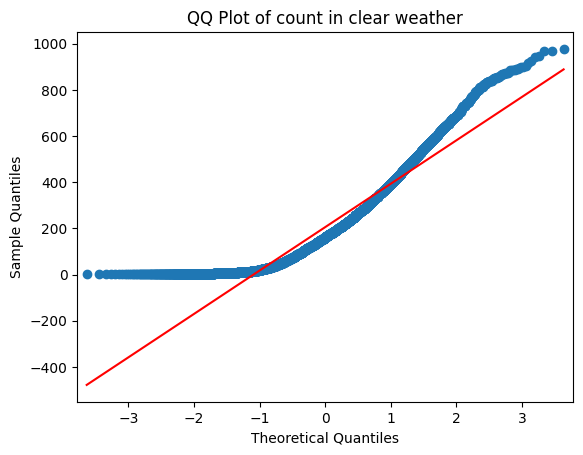

In [434]:
qqplot(df[df["weather"]=="clear"]["count"], line="s")
plt.title("QQ Plot of count in clear weather")
plt.show()

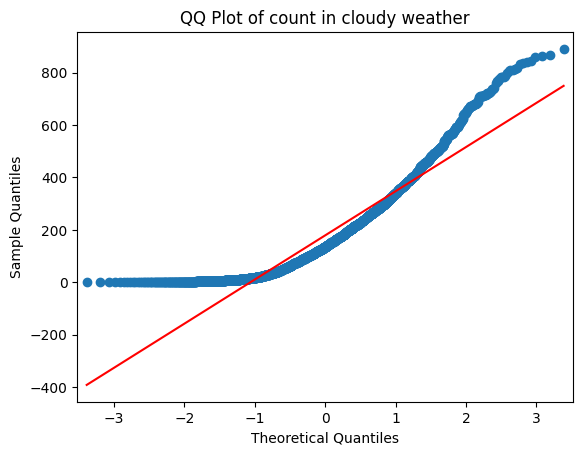

In [435]:
qqplot(df[df["weather"]=="cloudy"]["count"], line="s")
plt.title("QQ Plot of count in cloudy weather")
plt.show()

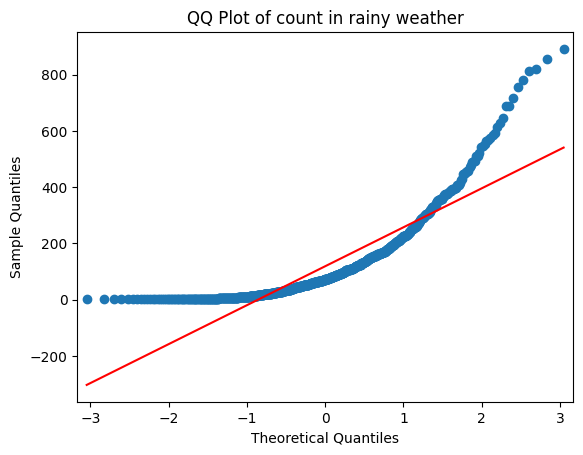

In [436]:
qqplot(df[df["weather"]=="rain"]["count"], line="s")
plt.title("QQ Plot of count in rainy weather")
plt.show()

#### Shapiro-Wilk Normality test

**Ho = distribution is gaussian**\
**Ha = distribution is not gaussain**

In [437]:
def shapiro_wilk_test(colname, categories, target, alpha):
    for cat in categories:
        score, pval = stats.shapiro(df[df[colname]==cat][target])
        if pval < alpha:
            print(f"{cat} is not Normally distibuted")
        else:
            print(f"{cat} is Normally distibuted")

In [438]:
colname = "weather"
categories = ["clear", "cloudy", "rain"]
target = "count"
alpha = 0.05
shapiro_wilk_test(colname, categories, target, alpha)

clear is not Normally distibuted
cloudy is not Normally distibuted
rain is not Normally distibuted


### Test of Variance (Levene Test)

**Ho = Variances are equal among distribution**\
**Ha = Variances are not equal among distribution**

In [439]:
test_stats, pval = stats.levene(
    df[df["weather"]=="clear"]["count"],
    df[df["weather"]=="cloudy"]["count"],
    df[df["weather"]=="rain"]["count"]
)
if pval<0.05:
    print("Variances are not similar among distribution")
else:
    print(" Variances are equal among distribution")

Variances are not similar among distribution


1. Both QQ plot and Shapiro-Walkin test proves that the count of bikes rented across different weather condition is not normally distributed
2. Levene test proves that there is no homogenity of varience among the distribution**
3. All the ditributions are independent to each other**
**As the assumptions of ANOVA test failed, we will perform Kruskal test along with ANOVA test**

### ANOVA Test

**Ho: All the distributions are same**\
**Ha: Atleat one of the distribution is different**

In [440]:
f_stats, pval = stats.f_oneway(
    df[df["weather"]=="clear"]["count"],
    df[df["weather"]=="cloudy"]["count"],
    df[df["weather"]=="rain"]["count"]
)
if pval<0.05:
    print("Atleats one of the distribution is different.")
    print("That means weather is significant in predicting the demand for bike")
else:
    print("All of the distribution is same.")
    print("That means there is no significant contribution\
    of weather in predicting the demand for bike")

Atleats one of the distribution is different.
That means weather is significant in predicting the demand for bike


### Kruskal Test

**Ho: All the distributions are same**\
**Ha: Atleat one of the distribution is different**

In [441]:
test_stats, pval = stats.kruskal(
    df[df["weather"]=="clear"]["count"],
    df[df["weather"]=="cloudy"]["count"],
    df[df["weather"]=="rain"]["count"]
)
if pval<0.05:
    print("Atleats one of the distribution is different.")
    print("That means weather is significant in predicting the demand for bike")
else:
    print("All of the distribution is same.")
    print("That means there is no significant contribution\
    of weather in predicting the demand for bike")

Atleats one of the distribution is different.
That means weather is significant in predicting the demand for bike


**Insights:**
1. In clear weather more number of bikes gets rented whereas in rainy weather less number of bikes gets rented
2. Also hypothesis testing proves that the difference is significant in predicting the demand for bike based on weather condition. So number of bikes rented is different is different weather condition

## 3. Test of Independence (Chi2 Test)

### 3.1. Season vs Weather

**Ho: weather is not dependent season**\
**Ha: weather is dependent on season**

In [442]:
data = pd.crosstab(
    index=df["season"],
    columns=df["weather"],
    values=df["count"],
    aggfunc = np.sum
)
data

weather,clear,cloudy,rain
season,,,
fall,470116,139386,31160
spring,223009,76406,13083
summer,426350,134177,27755
winter,356588,157191,30255


In [443]:
_,pval,_,_ = stats.chi2_contingency(data)

if pval<0.05:
    print("weather is dependent season")
else:
    print("weather is not dependent season")

weather is dependent season


**Insights:**
1. Based on the number of bikes rented in each season across different weather, There is a siginificant dependency of weather on season.
2. Since both the features are dependent, they are providinig the same information in predicting the demand of the bike. So we can remove one of the features to reduce the complexity of the analysis.

### 3.1. Workingday vs Holiday

**Ho: Workingday is not dependent holiday**\
**Ha: Workingday is dependent on holiday**

In [444]:
data = pd.crosstab(
    index=df["workingday"],
    columns=df["holiday"],
    values=df["count"],
    aggfunc = np.sum
).fillna(0)
data

holiday,holiday,non-holiday
workingday,,
non-workingday,57808.0,597064.0
workingday,0.0,1430604.0


In [445]:
_,pval,_,_ = stats.chi2_contingency(data)
if pval<0.05:
    print("Workingday is dependent holiday")
else:
    print("Workingday is not dependent holiday")

Workingday is dependent holiday


## 4. Multivariate Analysis

### 4.1. Distribution of bike rented in each season across different weather condition

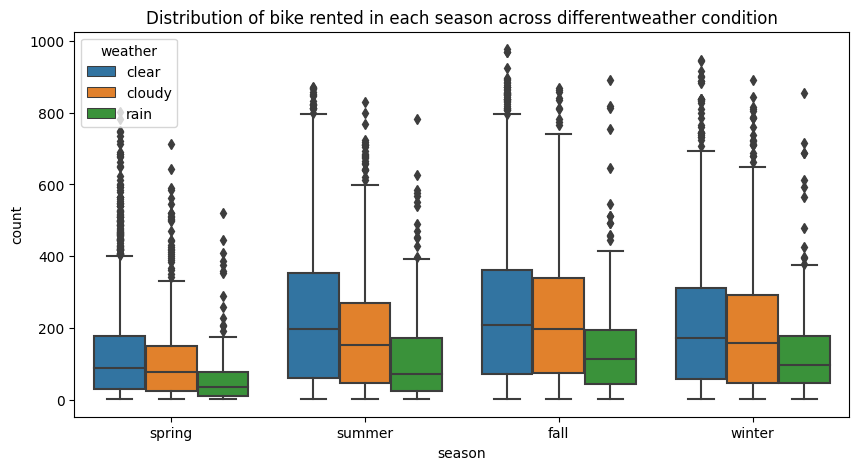

In [446]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="count", hue="weather")
plt.title("Distribution of bike rented in each season across different\
weather condition")
plt.show()

**Insights:**
1. This indicates the ratio of number of bikes rented in different weather is almost same across each season. 

### 4.2. Distribution of bike rented in each season for working and non working days

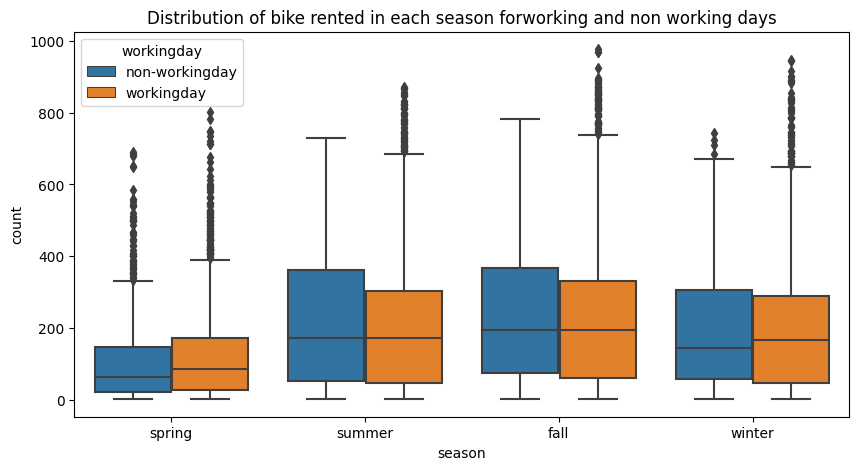

In [447]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="count", hue="workingday")
plt.title("Distribution of bike rented in each season for\
working and non working days")
plt.show()

### 4.3. Distribution of bike rented in each season for holidays and non holidays

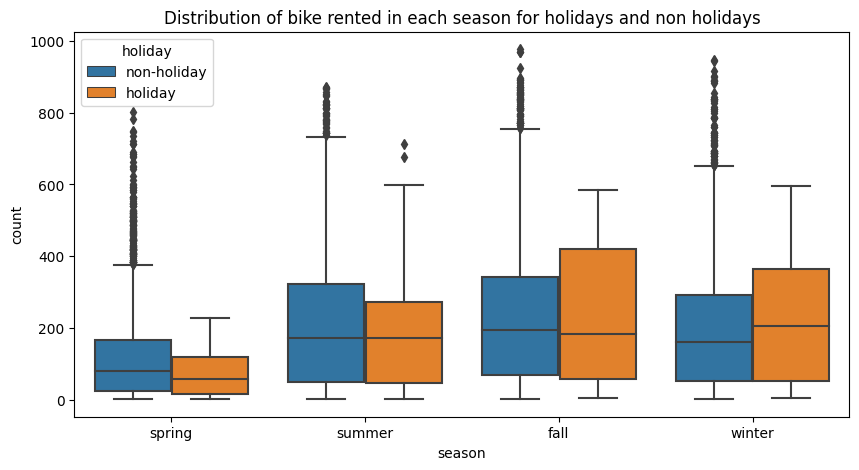

In [448]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="count", hue="holiday")
plt.title("Distribution of bike rented in each season for holidays and non holidays")
plt.show()

# 5. Exploratory Data Analysis (EDA) on Numerical Features

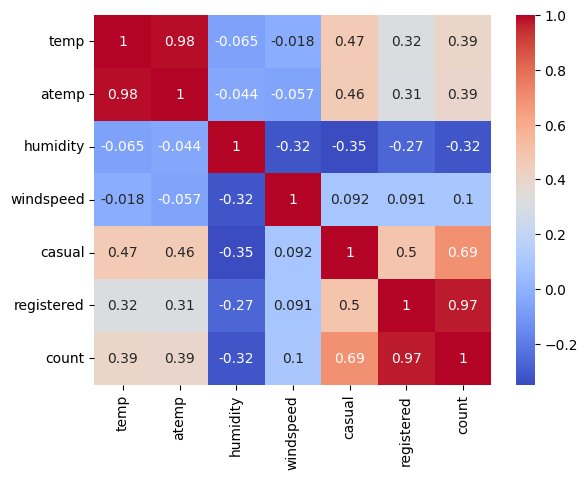

In [449]:
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm")
plt.show()

**Insights:**
1. Tempearture and feel like temperature is highly positively correlated. Since both are independent features, we can remove one feature to reduce the complexity of the analysis because both the features are providing same information in predicting the demand of the bikes
2. Similarly, number of times total users used the bike and number of times registered users used the bike are highly postively correlated. This indicates that regitered user uses the bike more frequetly than the casual user.
3. Casual user is weakly positive correlated with count which again proves that regitered user uses the bike more frequetly the the casual user.

## 5.1. Relation between Count with temperature and feel like temperature

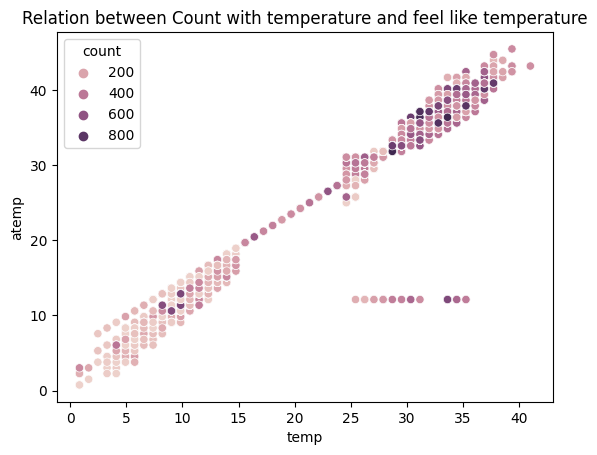

In [450]:
sns.scatterplot(data=df, x="temp", y="atemp", hue="count")
plt.title("Relation between Count with temperature and feel like temperature")
plt.show()

**Insights:**
1. This insights indicate higher number of user uses yulu bike when the temperature is little bit high (27-37 degree celsius)

### 5.2. Relation between Count with temperature and windspeed

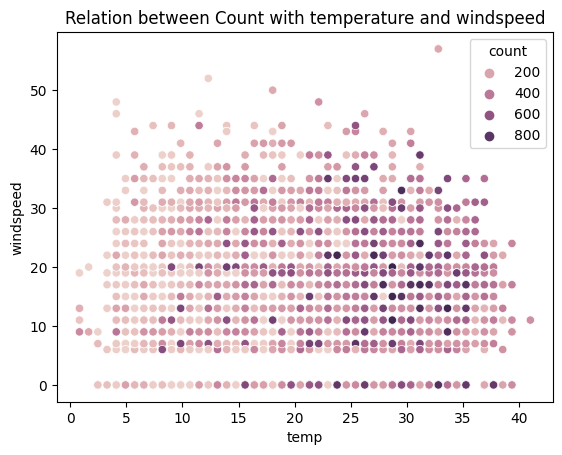

In [451]:
sns.scatterplot(data=df, x="temp", y="windspeed", hue="count")
plt.title("Relation between Count with temperature and windspeed")
plt.show()

**Insights:**
1. There is no relation. But we can see there is a gap between 0 and 8 in windspeed. This indicates that the zero might be the imputation of nan value.

### 5.3. Relation between Count with temperature and humidity

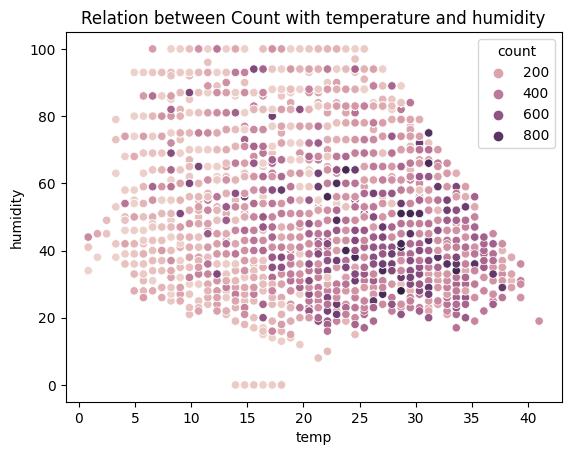

In [452]:
sns.scatterplot(data=df, x="temp", y="humidity", hue="count")
plt.title("Relation between Count with temperature and humidity")
plt.show()

**Insights:**
1. This insights indicate higher number of user uses yulu bike when the temperature is little bit high and humidity is low.

## 5.4. Effect of temperature on bike rented

To check the effect of temperature on the number of bike rented we will make the feel like temperature into category with different bins. Here, feel like temperature is used because feel like temperature is calculated from temperature, humidity and windspeed. So, feel like temperature has the information about all three features.

In [453]:
labels = ["extreme_low", "low", "moderate", "high", "extreme_high"]
df["atemp_bin"] = pd.cut(df["atemp"], 5, labels=labels)

In [454]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_interval,log_count,atemp_bin
0,2011-01-01 00:00:00,spring,non-holiday,non-workingday,clear,9.84,14.395,81,0.0,3,13,16,NaN,2.772589,low
1,2011-01-01 01:00:00,spring,non-holiday,non-workingday,clear,9.02,13.635,80,0.0,8,32,40,1.0,3.688879,low
2,2011-01-01 02:00:00,spring,non-holiday,non-workingday,clear,9.02,13.635,80,0.0,5,27,32,1.0,3.465736,low
3,2011-01-01 03:00:00,spring,non-holiday,non-workingday,clear,9.84,14.395,75,0.0,3,10,13,1.0,2.564949,low
4,2011-01-01 04:00:00,spring,non-holiday,non-workingday,clear,9.84,14.395,75,0.0,0,1,1,1.0,0.000000,low


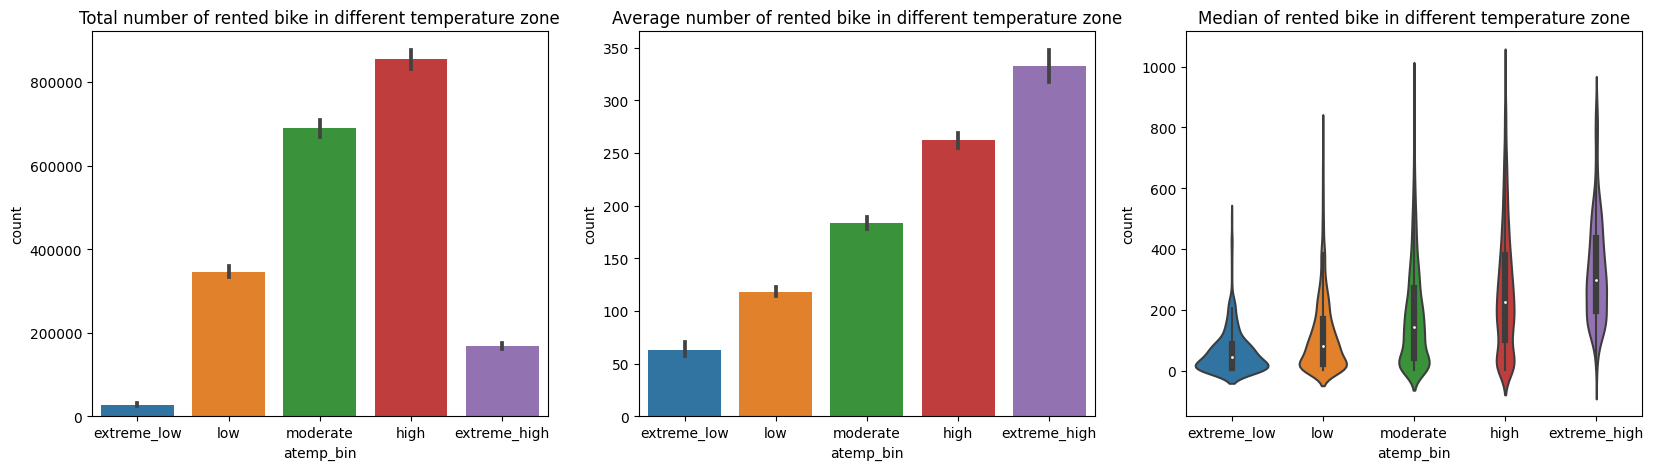

In [455]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=df, x="atemp_bin", y="count", estimator="sum")
plt.title("Total number of rented bike in different temperature zone")

plt.subplot(1,3,2)
sns.barplot(data=df, x="atemp_bin", y="count", estimator="mean")
plt.title("Average number of rented bike in different temperature zone")

plt.subplot(1,3,3)
sns.violinplot(data=df, x="atemp_bin", y="count")
plt.title("Median of rented bike in different temperature zone")
plt.show()

**Insights:**
1. Though the total bike rented is high in moderate and high temperature zone, but the mean and median suggests that demand of rented bike is high in the higher temperature zone.

### Hypothesis Testing

As we have five distribution (extreme_low, low, moderate, high, extreme_high temperature) to test, we will perform **ANOVA test**. But to perform ANOVA test we need to check 3 assumptions: 
1. Sample should be normally distributed.
2. Sample should have equal varience.
3. they should be Independent.

If these assumptions fail then we will perform **Kruskal test**.\
**Note:** For better understanding even if the assumptions fail, we will go ahead with ANOVA test along woth Kruskal test

In [456]:
colname = "atemp_bin"
categories = ["extreme_low", "low", "moderate", "high", "extreme_high"]
target = "count"

In [457]:
cal_mean(colname, categories, target)

Mean of extreme_low: 63
Mean of low: 118
Mean of moderate: 184
Mean of high: 262
Mean of extreme_high: 332


### Test of Normality

#### QQPlot

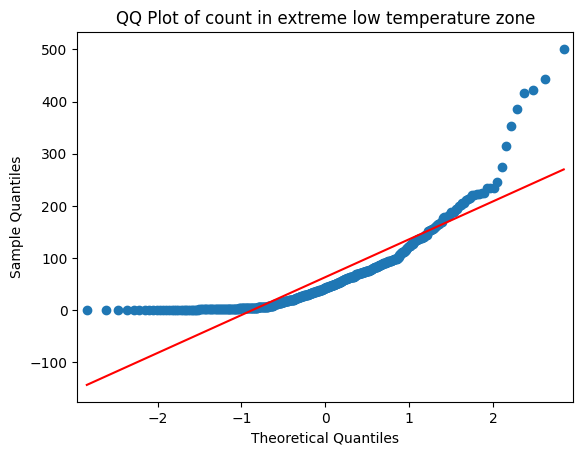

In [458]:
qqplot(df[df["atemp_bin"]=="extreme_low"]["count"], line="s")
plt.title("QQ Plot of count in extreme low temperature zone")
plt.show()

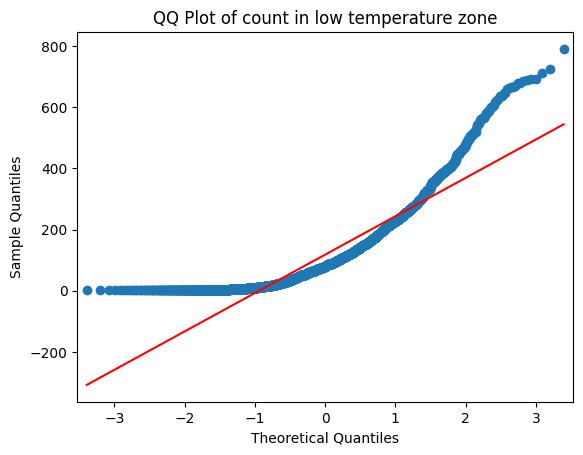

In [459]:
qqplot(df[df["atemp_bin"]=="low"]["count"], line="s")
plt.title("QQ Plot of count in low temperature zone")
plt.show()

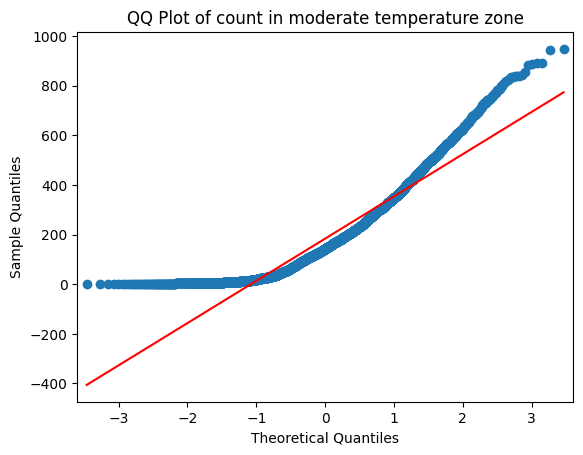

In [460]:
qqplot(df[df["atemp_bin"]=="moderate"]["count"], line="s")
plt.title("QQ Plot of count in moderate temperature zone")
plt.show()

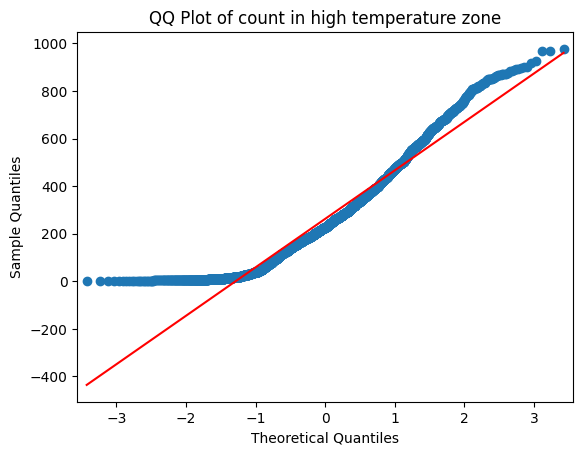

In [461]:
qqplot(df[df["atemp_bin"]=="high"]["count"], line="s")
plt.title("QQ Plot of count in high temperature zone")
plt.show()

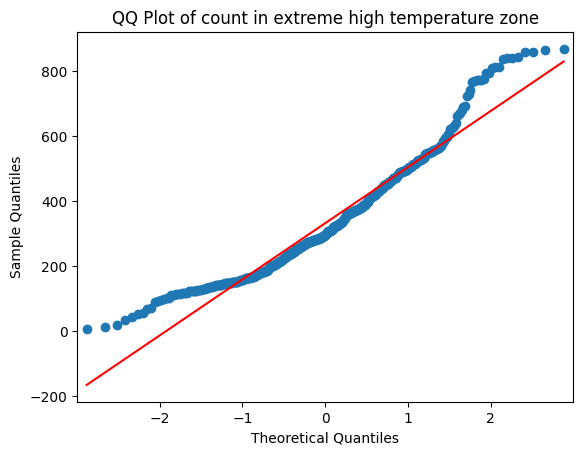

In [462]:
qqplot(df[df["atemp_bin"]=="extreme_high"]["count"], line="s")
plt.title("QQ Plot of count in extreme high temperature zone")
plt.show()

#### Shapiro-Wilk Normality test

**Ho = distribution is gaussian**\
**Ha = distribution is not gaussain**

In [463]:
shapiro_wilk_test(colname, categories, target, 0.05)

extreme_low is not Normally distibuted
low is not Normally distibuted
moderate is not Normally distibuted
high is not Normally distibuted
extreme_high is not Normally distibuted


### Test of Variance (Levene Test)

**Ho = Variances are equal among distribution**\
**Ha = Variances are not equal among distribution**

In [464]:
test_stats, pval = stats.levene(
    df[df["atemp_bin"]=="low"]["count"],
    df[df["atemp_bin"]=="extreme_low"]["count"],
    df[df["atemp_bin"]=="moderate"]["count"],
    df[df["atemp_bin"]=="high"]["count"],
    df[df["atemp_bin"]=="extreme_high"]["count"]
)
if pval<0.05:
    print("Variances are not similar among distribution")
else:
    print(" Variances are equal among distribution")

Variances are not similar among distribution


1. Both QQ plot and Shapiro-Walkin test proves that the count of bikes rented across different tempearture zone is not normally distributed
2. Levene test proves that there is no homogenity of varience among the distribution**
3. All the ditributions are independent to each other**
**As the assumptions of ANOVA test failed, we will perform Kruskal test along with ANOVA test**

### ANOVA Test

**Ho: All the distributions are same**\
**Ha: Atleat one of the distribution is different**

In [465]:
f_stats, pval = stats.f_oneway(
    df[df["atemp_bin"]=="low"]["count"],
    df[df["atemp_bin"]=="extreme_low"]["count"],
    df[df["atemp_bin"]=="moderate"]["count"],
    df[df["atemp_bin"]=="high"]["count"],
    df[df["atemp_bin"]=="extreme_high"]["count"]
)
if pval<0.05:
    print("Atleats one of the distribution is different.")
    print("That means temperature is significant in predicting the demand for bike")
else:
    print("All of the distribution is same.")
    print("That means there is no significant contribution\
    of temperature in predicting the demand for bike")

Atleats one of the distribution is different.
That means temperature is significant in predicting the demand for bike


### Kruskal Test

**Ho: All the distributions are same**\
**Ha: Atleat one of the distribution is different**

In [466]:
test_stats, pval = stats.kruskal(
    df[df["atemp_bin"]=="low"]["count"],
    df[df["atemp_bin"]=="extreme_low"]["count"],
    df[df["atemp_bin"]=="moderate"]["count"],
    df[df["atemp_bin"]=="high"]["count"],
    df[df["atemp_bin"]=="extreme_high"]["count"]
)
if pval<0.05:
    print("Atleats one of the distribution is different.")
    print("That means temperature is significant in predicting the demand for bike")
else:
    print("All of the distribution is same.")
    print("That means there is no significant contribution\
    of temperature in predicting the demand for bike")

Atleats one of the distribution is different.
That means temperature is significant in predicting the demand for bike


**Insights:**
1. Hypothesis testing also proves that the temperature is significant in predicting the demand of the bike

## 5.5. Effect of temperature on bike rented

In [467]:
df["hour"] = df["datetime"].apply(lambda x: x.hour)

In [468]:
df["day_part"] = (df['hour'] % 24 + 6) // 6
df["day_part"].replace({
    1: "night",
    2: "morning",
    3: "afternoon",
    4: "evening"
}, inplace=True)

In [469]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_interval,log_count,atemp_bin,hour,day_part
0,2011-01-01 00:00:00,spring,non-holiday,non-workingday,clear,9.84,14.395,81,0.0,3,13,16,NaN,2.772589,low,0,night
1,2011-01-01 01:00:00,spring,non-holiday,non-workingday,clear,9.02,13.635,80,0.0,8,32,40,1.0,3.688879,low,1,night
2,2011-01-01 02:00:00,spring,non-holiday,non-workingday,clear,9.02,13.635,80,0.0,5,27,32,1.0,3.465736,low,2,night
3,2011-01-01 03:00:00,spring,non-holiday,non-workingday,clear,9.84,14.395,75,0.0,3,10,13,1.0,2.564949,low,3,night
4,2011-01-01 04:00:00,spring,non-holiday,non-workingday,clear,9.84,14.395,75,0.0,0,1,1,1.0,0.000000,low,4,night


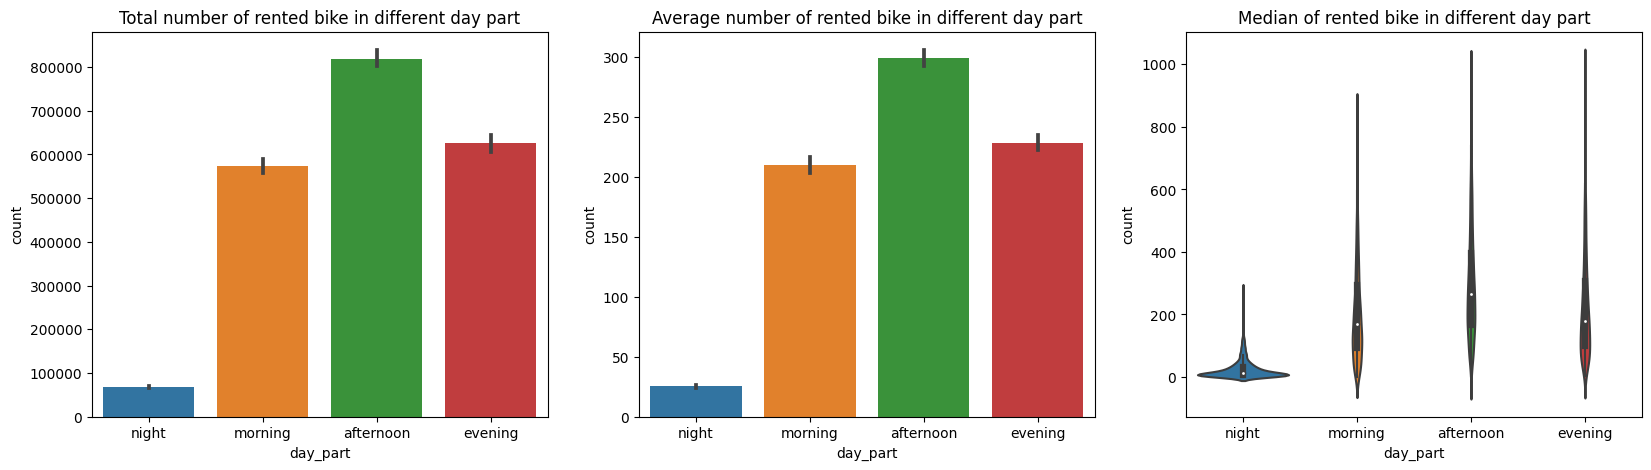

In [470]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=df, x="day_part", y="count", estimator="sum")
plt.title("Total number of rented bike in different day part")

plt.subplot(1,3,2)
sns.barplot(data=df, x="day_part", y="count", estimator="mean")
plt.title("Average number of rented bike in different day part")

plt.subplot(1,3,3)
sns.violinplot(data=df, x="day_part", y="count")
plt.title("Median of rented bike in different day part")
plt.show()

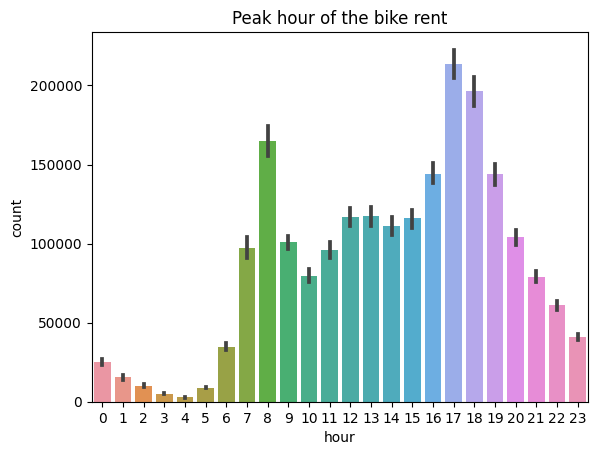

In [471]:
sns.barplot(data=df, x="hour", y="count", estimator="sum")
plt.title("Peak hour of the bike rent")
plt.show()

**Insights:**
1. All the plots suggests that mostly bikes are rented in morning, afternoon and evening. In night few bikes gets rented, so company can use this time to maintain and recharge the bikes.
2. Peak hour is 8 am in the morning and 4-7 pm in the evening. 

# Insights & Recommendation.

1. Based on the hypothesis testing following features have been identified as significant for predicting bike rental demand: 
    1. datetime
    2. season
    3. workingday
    4. weather
    5. atemp
    **Recommendation:** Given the significance of these features, Yulu should focus its predictive models and marketing efforts around these factors. For example, the company can create targeted marketing campaigns that consider both weather conditions and seasonality, offer promotions on non-working days, and optimize bike availability during peak demand hours based on these features to maximize rental demand and customer satisfaction.


2. The data shows that most bike rentals occur during the morning, afternoon, and evening hours. However, there is a drop in rentals during the night.\
    **Recommendation:** Yulu should consider implementing a maintenance and recharging schedule during the night time hours when bike rentals are lower. This can help ensure that bikes are in good condition and fully charged during peak rental times, enhancing customer satisfaction and operational efficiency.


3. The Peak hour for bike rentals is at 8 am in the morning and again from 4 pm to 7 pm in the evening.\ 
    **Recommendation:** Yulu should implement a dynamic pricing strategy that reflects the demand during peak hours. During the morning and evening peak hours, when demand for bike rentals is high, the company can slightly increase rental rates. Conversely, during off-peak hours, offering discounted rates or promotions can encourage more usage. This flexible pricing approach can help balance demand throughout the day. Additionally, the company should ensure that there is a sufficient supply of bikes available during these peak periods to meet the high demand. 


4. The data indicates a strong positive correlation between the total number of bike uses and the frequency of bike usage by registered users. This suggests that registered users tend to use the bikes more often compared to casual users. On the other hand, the correlation between casual users and the total bike count is weakly positive, further supporting the notion that registered users are the primary drivers of frequent bike usage.\
    **Recommendation:** Given that registered users are more active in using the bikes, Yulu should focus on strategies to retain and engage this user segment. Offering exclusive benefits, discounts, or loyalty programs to registered users can encourage them to continue using the service regularly. At the same time, efforts should also be made to attract and convert more casual users into registered users to strengthen the user base.
  

5. On average, the Spring season had the lowest number of bike rentals, while the Fall season saw the highest number of bike rentals.\
    **Recommendation:** Yulu should take advantage of the higher demand during the Fall season, possibly by launching special promotions, events, or marketing campaigns to attract more users during this period. During the Spring season, when demand is lower, the company can focus on maintenance and preparation for the upcoming peak season to ensure bikes are in excellent condition for the Fall surge in rentals.


6. In clear weather conditions, there is a higher demand for bike rentals, while in rainy weather, the number of bike rentals decreases.\
    **Recommendation:** Yulu should take advantage of the increased demand during clear weather by promoting bike rentals and potentially offering weather-related discounts or incentives. During rainy weather, the company can consider strategies such as offering rain gear or special promotions to encourage rentals despite the less favorable conditions. Additionally, ensuring that bikes are well-maintained and safe for riding in rainy conditions can help retain customers.


7. The classification between working days and non-working days does play a significant role in predicting bike rental demand.\
    **Recommendation:** Yulu should adapt its operational and marketing strategies to align with the varying demand on working days and non-working days. On working days, the company can focus on promoting bike rentals for commuting purposes. On non-working days, it should emphasize leisure or recreational use of the bikes. Additionally, Yulu should explore partnerships with delivery service providers, such as food or grocery delivery, to maintain consistent demand throughout the week. 
    

8. The distinction between holidays and non-holidays does not significantly impact the prediction of bike rental demand.\
    **Recommendation:** Since holidays and non-holidays do not have a substantial impact on bike rental demand, Yulu may choose to allocate its resources and marketing efforts more evenly throughout the year. This means that the company doesn't need to create separate strategies for holidays and regular days but can maintain a consistent approach to serve its customers effectively.
 

9. More users choose Yulu bikes when the temperature is slightly higher and humidity levels are lower.\
    **Recommendation:** Yulu should consider adjusting its marketing strategies and promotions to target periods with these weather conditions, as they appear to attract more users. Additionally, the company might want to focus on maintaining and expanding its bike fleet during these weather conditions to meet the increased demand effectively.
    

10. Based on the number of bikes rented in each season under various weather conditions, it appears that there is a significant relationship or dependency between weather and season.


Thank You!